In [128]:
# Import necessary libraries

import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [129]:
# Load the Iris dataset

iris=datasets.load_iris()

In [130]:
# Create a pandas DataFrame from the dataset

df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [131]:
# Extract the features and target variable

iris_x=iris.data
iris_y=iris.target

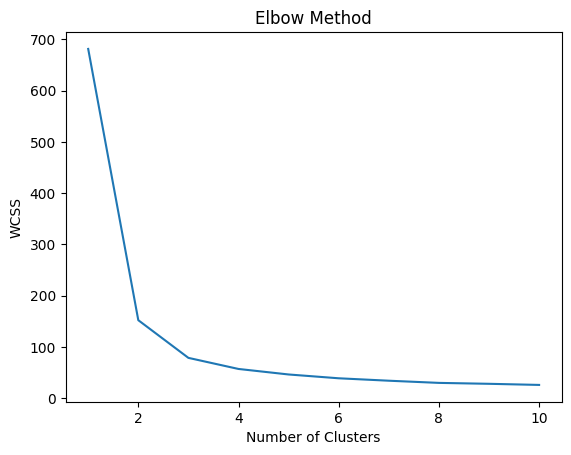

In [132]:
# Perform Elbow method to find optimal number of Clusters in Kmeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(iris_x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [133]:
# Perform K-means clustering on the original features

model=KMeans(n_clusters=3,n_init=1,max_iter=100)
model.fit(iris_x)

# Get the cluster labels and centroids

all_predictions=model.predict(iris_x)
centroids=model.cluster_centers_

<function matplotlib.pyplot.show(close=None, block=None)>

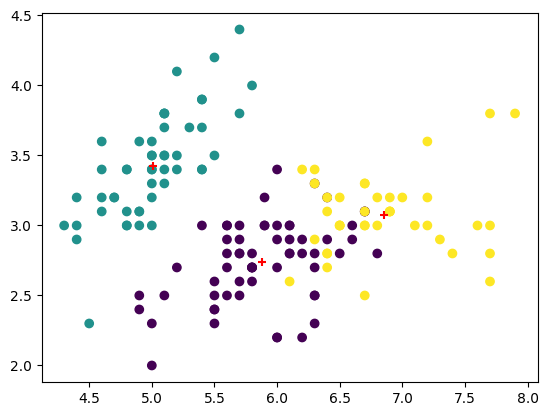

In [134]:
# Visualize the clusters using a scatter plot
# Perform K-means clustering on the reduced features
model = KMeans(n_clusters=3, n_init=10, max_iter=300, random_state=42)
model.fit(x_reduced)

plt.scatter(iris_x[:,0],iris_x[:,1],c=all_predictions)
plt.scatter(centroids[:,0],centroids[:,1],marker='+',color="Red")
plt.show

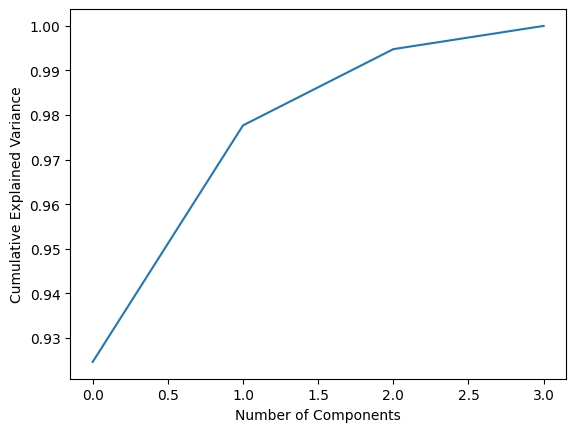

In [135]:
#FIND number of components through Cumsum
pca = PCA().fit(iris_x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [136]:
# Perform PCA to reduce the dimensionality of the data
pca = PCA(n_components=2)
x_reduced = pca.fit_transform(iris_x)


In [137]:
# Perform K-means clustering on the reduced features
model = KMeans(n_clusters=3, n_init=10, max_iter=300, random_state=42)
model.fit(x_reduced)

# Get the cluster labels and centroids

all_predictions=model.predict(x_reduced)
centroids=model.cluster_centers_

<function matplotlib.pyplot.show(close=None, block=None)>

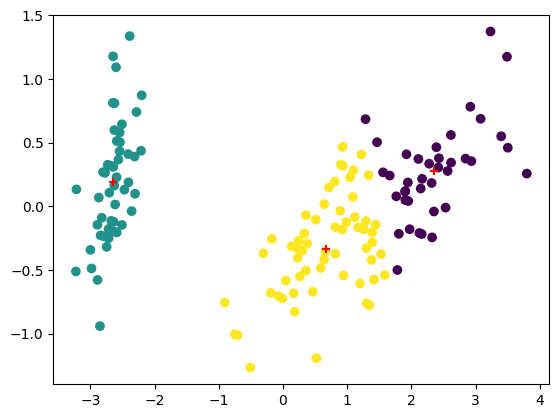

In [138]:
# Visualize the clusters using a scatter plot

plt.scatter(x_reduced[:,0],x_reduced[:,1],c=all_predictions)
plt.scatter(centroids[:,0],centroids[:,1],marker='+',color="Red")
plt.show

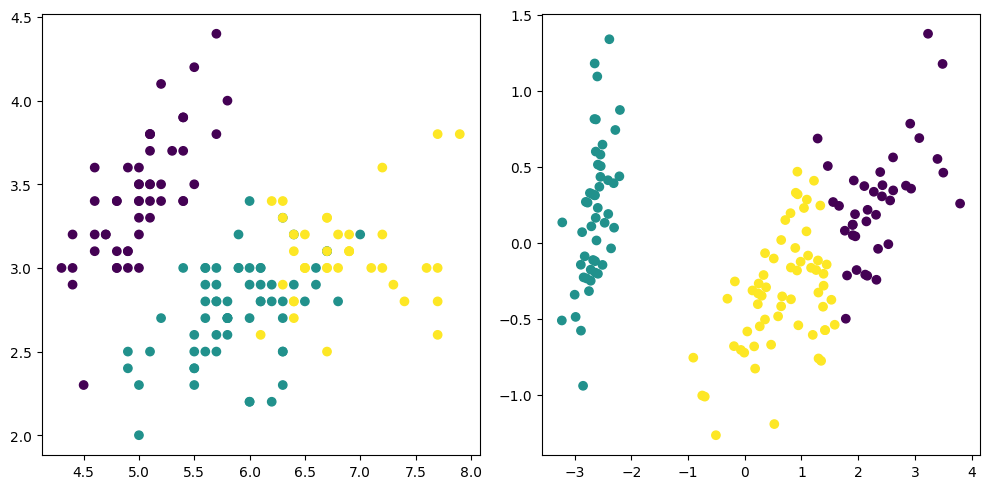

In [139]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axs[0].scatter(iris_x[:, 0], iris_x[:, 1], c=kmeans_predictions)

# Plot KMeans clustering on PCA-reduced data
axs[1].scatter(x_reduced[:, 0], x_reduced[:, 1], c=kmeans_pca_predictions)

plt.tight_layout()
plt.show()